In [38]:
import numpy as np
from matplotlib import pyplot as plt
from torchvision import datasets, transforms
from collections import defaultdict,Counter
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.decomposition import KernelPCA
import seaborn as sns
import pip

In [28]:
!pip3 install torchvision
!pip3 install sklearn
pip.main(['install','seaborn'])
#https://colab.research.google.com/drive/1nkAZaX5QQhnO3XN3FE27jW3JKk0tcPd_#scrollTo=qn_Wlugz3BBZ
#https://medium.com/@aaysbt/fashion-mnist-data-training-using-pytorch-7f6ad71e96f4

# PCA Visualization

In [39]:
train_set = datasets.FashionMNIST("FashionMnist",train = True)
test_set = datasets.FashionMNIST('FashionMnist', train=False)

x_tr = train_set.data.numpy().reshape(60000,-1)
target_tr =  train_set.targets.numpy()
x_te = test_set.data.numpy().reshape(10000,-1)
target_te = test_set.targets.numpy()


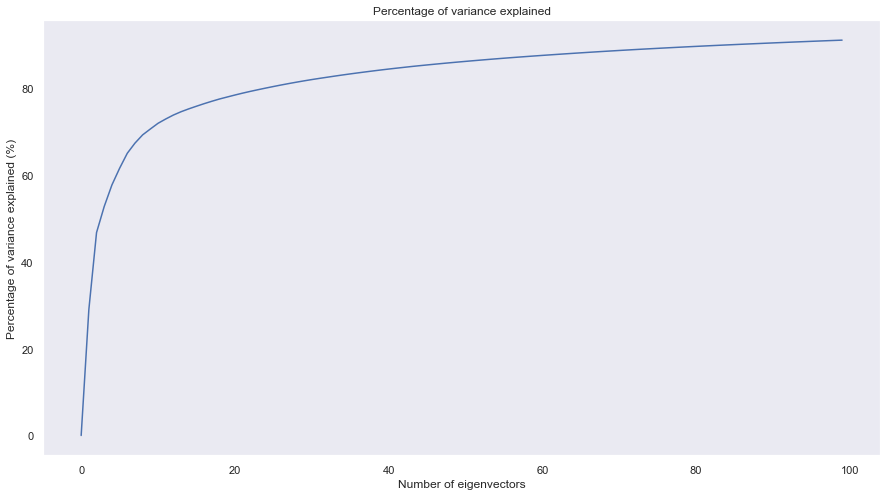

In [44]:
pca = PCA()
X_transformed = pca.fit_transform(x_tr)

eigvals = pca.explained_variance_
ev = (eigvals)/np.sum(eigvals)
cumvar = np.cumsum(ev)
cumvar = 100*np.insert(cumvar,0,0)
cumvar_100 = cumvar[:100]

cumvar_10 = np.array(cumvar_100)
fig,ax=plt.subplots(1,1);
ax.plot(cumvar_10); 
ax.grid(); 
ax.set_ylabel('Percentage of variance explained (%)')
ax.set_xlabel('Number of eigenvectors')
ax.set_title('Percentage of variance explained');

# SOTA: Convolutional Neural Network


In [45]:
from __future__ import print_function, division
import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler
import torch.backends.cudnn as cudnn
import numpy as np
import torchvision
from torchvision import datasets, models, transforms
import matplotlib.pyplot as plt
import time
import os
import copy

In [46]:
transform = transforms.Compose([transforms.ToTensor(),
                               transforms.Normalize((0.5,),(0.5,),)]) 

batch_size = 64

trainset = torchvision.datasets.FashionMNIST(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.FashionMNIST(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)

classes = (0,1,2,3,4,5,6,7,8,9)

In [47]:
import torch.nn as nn
import torch.nn.functional as F



class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(1, 6, 5)
        self.bn1 = nn.BatchNorm2d(6)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.bn2 = nn.BatchNorm2d(16)
        self.fc1 = nn.Linear(256, 120)
        self.bn3 = nn.BatchNorm1d(120)
        self.fc2 = nn.Linear(120, 84)
        self.bn4 = nn.BatchNorm1d(84)
        self.fc3 = nn.Linear(84, 10)
        
        
        

    def forward(self, x):
        x = self.pool(F.relu(self.bn1(self.conv1(x))))
        x = self.pool(F.relu(self.bn2(self.conv2(x))))
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = F.relu(self.bn3(self.fc1(x)))
        x = F.relu(self.bn4(self.fc2(x)))
        x = self.fc3(x)
        return x



In [48]:
def evaluate(model, dataset):
    model.eval()
    correct = 0
    total = 0

    with torch.no_grad():
        loss_arr = []
        for i, (images, labels) in enumerate(dataset):
            # calculate outputs by running images through the network
            output = model(images)
            loss= criterion(output,labels)
            loss_arr.append(loss)
            # the class with the highest energy is what we choose as prediction
            _, predicted = torch.max(output.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    accuracy =100 * correct // total
    loss_avg = np.mean(loss_arr)
    model.train()
    
    return loss_avg,accuracy

In [49]:
net = Net()
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

net.train()

batches = 0
train_losses = []
valid_losses = []
accuracy_val_arr = []
accuracy_tr_arr = []
x_axis = []


for epoch in range(8):  # loop over the dataset multiple times
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
     
    train_loss = running_loss/len(trainloader)
    
    #validation 
    valid_loss,accuracy_val = evaluate(net, testloader)
    
    _,accuracy_tr = evaluate(net,trainloader)

    batches +=100
    train_losses.append(train_loss)
    valid_losses.append(valid_loss)
    accuracy_val_arr.append(accuracy_val)
    accuracy_tr_arr.append(accuracy_tr)
    x_axis.append(batches)

    print('epoch: ', epoch)
    print("validation loss: ",valid_loss)
    print("train loss", train_loss)
    print("validation accuracy: ", accuracy_val)
    print("training accuracy: ", accuracy_tr)
    print("")

print('Finished Training')

epoch:  0
validation loss:  0.47073072
train loss 0.7263167895424341
validation accuracy:  84
training accuracy:  85

epoch:  1
validation loss:  0.38068622
train loss 0.41539960503895906
validation accuracy:  86
training accuracy:  87

epoch:  2
validation loss:  0.35143143
train loss 0.35416934817139784
validation accuracy:  87
training accuracy:  89

epoch:  3
validation loss:  0.33459458
train loss 0.32293839678803743
validation accuracy:  88
training accuracy:  89

epoch:  4
validation loss:  0.32611853
train loss 0.3054793980806621
validation accuracy:  88
training accuracy:  90

epoch:  5
validation loss:  0.30904752
train loss 0.28628406104153153
validation accuracy:  88
training accuracy:  91

epoch:  6
validation loss:  0.3138673
train loss 0.2750418007230835
validation accuracy:  88
training accuracy:  91

epoch:  7
validation loss:  0.3088738
train loss 0.2642795416051899
validation accuracy:  88
training accuracy:  91

Finished Training


# Results and Analysis


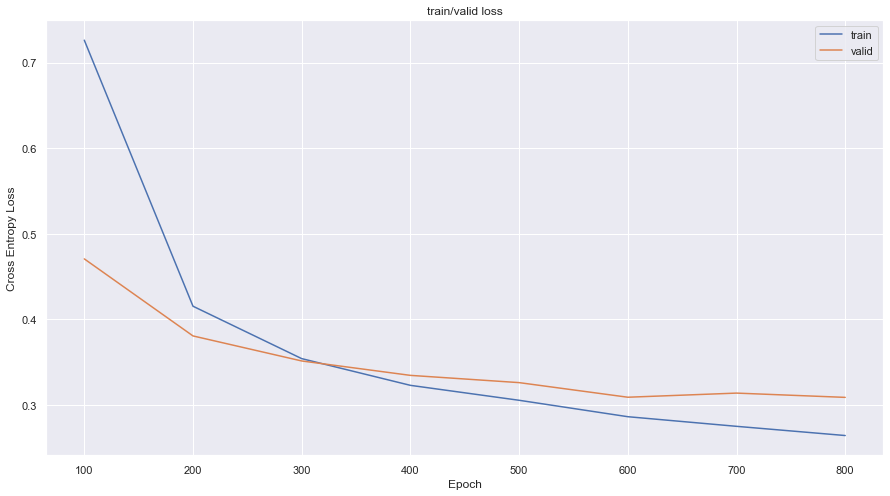

In [50]:
def plot_stats(arrs, title,y_label, legends):
    for i,arr in enumerate(arrs):
        e = len(arr)
        plt.plot(x_axis,arr, label = legends[i])
    plt.ylabel(y_label)
    plt.xlabel("Epoch")
    plt.xticks(x_axis)
    plt.legend(loc='best')
    plt.title(title)
    save_title = "_".join(title.split(" "))
    plt.show()

plot_stats([train_losses, valid_losses],'train/valid loss','Cross Entropy Loss',['train','valid'])

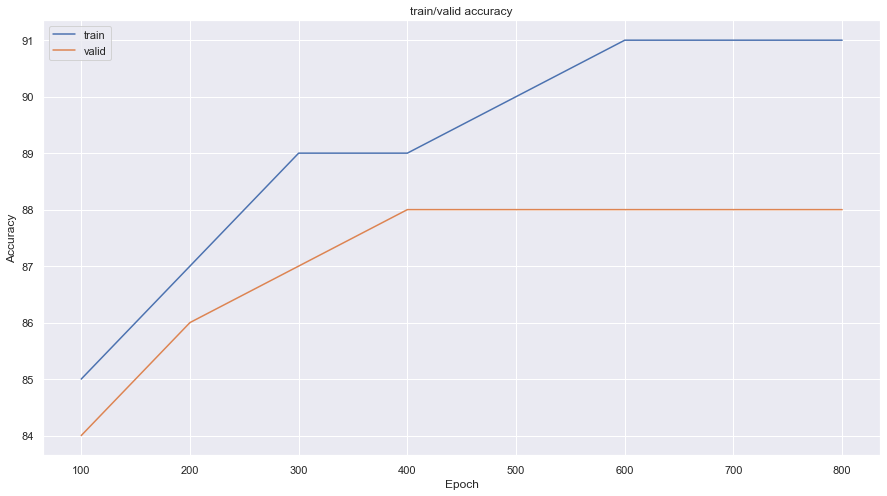

In [51]:
plot_stats([accuracy_tr_arr, accuracy_val_arr],'train/valid accuracy','Accuracy',['train','valid'])

In [52]:
PATH = './cifar_net.pth'
torch.save(net.state_dict(), PATH)

In [53]:
correct = 0
total = 0
# since we're not training, we don't need to calculate the gradients for our outputs
pred = []
true_label = []
with torch.no_grad():
    for data in testloader:
        images, labels = data
        # calculate outputs by running images through the network
        outputs = net(images)
        # the class with the highest energy is what we choose as prediction
        _, predicted = torch.max(outputs.data, 1)
        
        total += labels.size(0)
        pred +=predicted
        true_label += labels
        correct += (predicted == labels).sum().item()

print(f'Accuracy of the network on the 10000 test images: {100 * correct // total} %')

Accuracy of the network on the 10000 test images: 88 %


<AxesSubplot:>

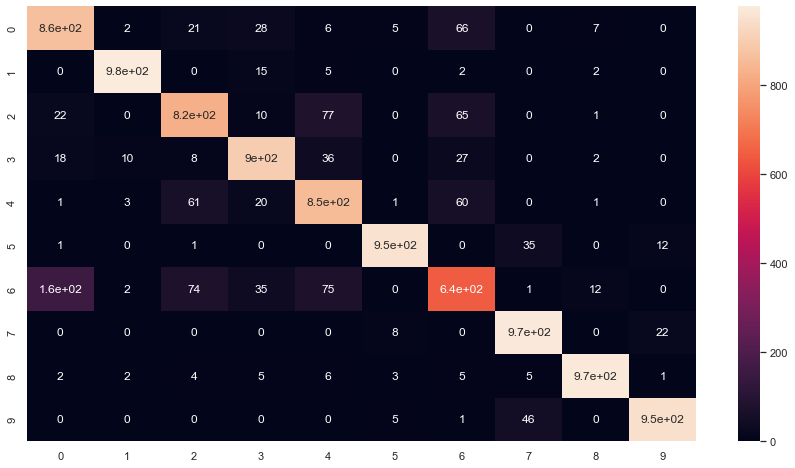

In [54]:
from sklearn.metrics import confusion_matrix
cf = confusion_matrix(true_label,pred)
sns.set(rc = {'figure.figsize':(15,8)})
sns.heatmap(cf, annot=True)

In [55]:
xa = []
ya = []
print('class  accuracy' )
for i in range(len(cf)):
    rowsum = sum(cf[i])    
    print(" ", i,"   ",cf[i][i]/rowsum)
    xa.append(i)
    ya.append(cf[i][i]/rowsum)

class  accuracy
  0     0.865
  1     0.976
  2     0.825
  3     0.899
  4     0.853
  5     0.951
  6     0.643
  7     0.97
  8     0.967
  9     0.948
